In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cvfunc import color_threshold,auto_crop

In [85]:
img = cv2.imread('shrink/East_day105_16Apr2013_S.png')

In [86]:
img_mask = color_threshold(img,[[255,255,255]],[[255,255,255]],invert=True)

In [87]:
img = cv2.bitwise_and(img,img,mask=img_mask.astype(np.uint8))

In [88]:
height,width,channels = img.shape

In [89]:
img_heightened = np.zeros((int(height*1.5),width,channels))

In [90]:
img_heightened[int(height/4):int(5*height/4),:,:] = img

In [91]:
img_heightened = img_heightened.astype(np.uint8)

In [92]:
img = img_heightened

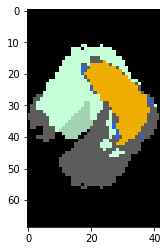

In [93]:
plt.imshow(img)

In [94]:
height,width,channels = img.shape

In [111]:
N = 10 #Number of partitions
Alpha = 0.8 #Deformation constant

In [112]:
Dx = img.shape[1]/(N+1)

In [113]:
Dx

3.8181818181818183

In [114]:
def alpha(n): return Alpha*n/N

In [115]:
def S(dx,n): return (dx/2)*alpha(n)/(1+alpha(n)) + dx*sum([alpha(j)/(1+alpha(j)) for j in range(n+1,N+1)])

In [116]:
def P(n): return (Dx*(n+1/2),height/2)

In [117]:
def F(n):
    return np.array([
        [1/(1+alpha(n)),0,S(Dx,n)+P(n)[0]*alpha(n)/(1+alpha(n))],
        [0,(1+alpha(n)),-alpha(n)*P(n)[1]]
    ])

In [118]:
F(5)

array([[  0.71428571,   0.        ,  13.93971369],
       [  0.        ,   1.4       , -13.8       ]])

In [119]:
def partition(n): return np.array([[[Dx*n,0],[Dx*(n+1),0],[Dx*(n+1),height],[Dx*n,height]]],dtype=np.int32)

In [120]:
def mask_partition(Img,n):
    img_mask = Img.copy()
    cv2.fillConvexPoly(img_mask,partition(n),(0,0,0))
    return (Img-img_mask).copy()

In [121]:
layers = [mask_partition(img,n) for n in range(N+1)]

In [122]:
F_layers = [cv2.warpAffine(layer,F(n),(layer.shape[1],layer.shape[0])) for n,layer in enumerate(layers)]

In [123]:
img_melted = np.zeros_like(img,dtype=np.uint8)
for F_layer in F_layers:
    img_melted = cv2.max(img_melted,F_layer)

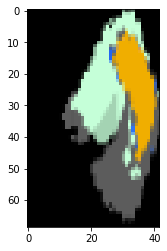

In [124]:
plt.imshow(img_melted)